## Imports

In [1]:
from time_series_generation import *
from phid import *
from network_analysis import *
from hf_token import TOKEN

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Time Series

In [9]:
time_series = [load_time_series(i) for i in range(0,5)]
    # List to hold averaged attention weights for each prompt
averaged_attention_weights_per_prompt = []

for time_serie in time_series:
    # Average the attention weights across all timesteps for each prompt
    avg_attention_weights = torch.mean(time_serie["attention_weights"], axis=2)
    # Collect averaged attention weights
    averaged_attention_weights_per_prompt.append(avg_attention_weights)

category_attention_weights_tensor = torch.tensor(np.array(averaged_attention_weights_per_prompt))

# Since we want [num_layers, num_heads, num_prompts], we transpose the axes
print(category_attention_weights_tensor.shape)

torch.Size([5, 18, 8])


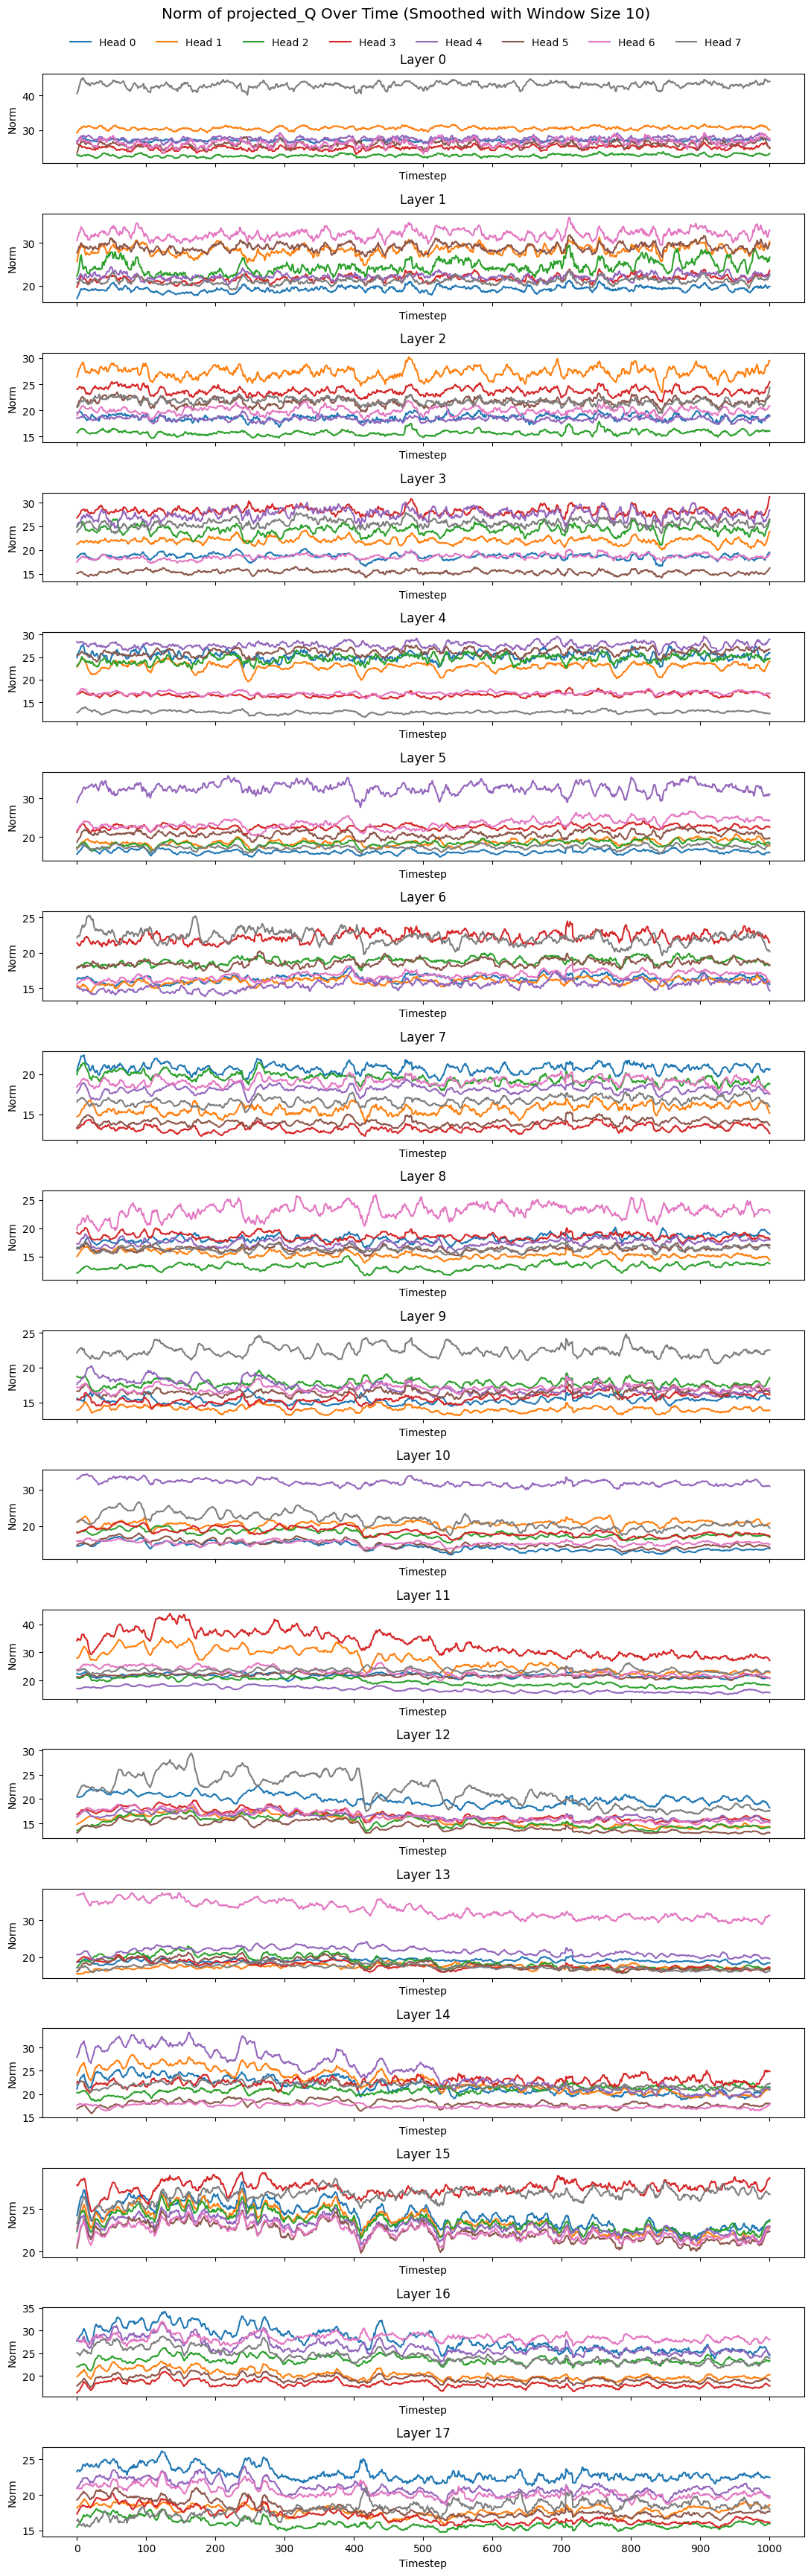

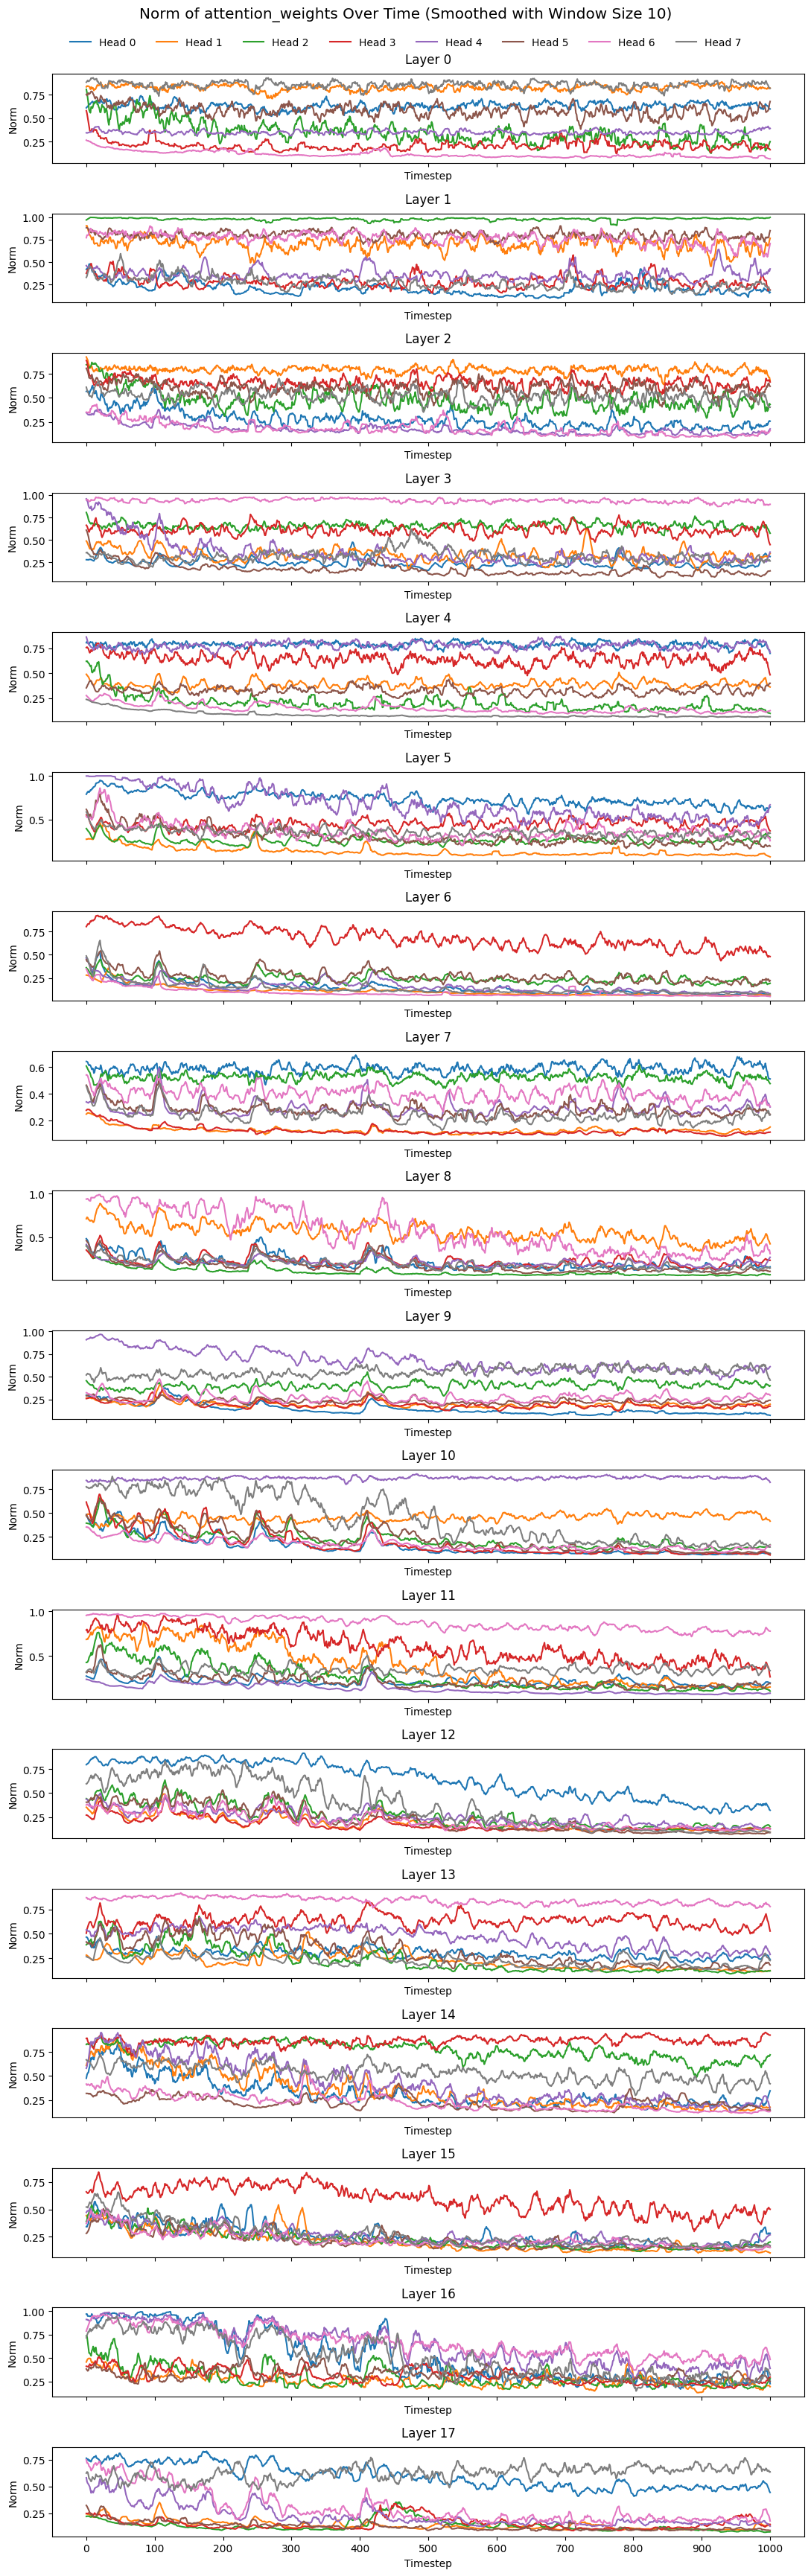

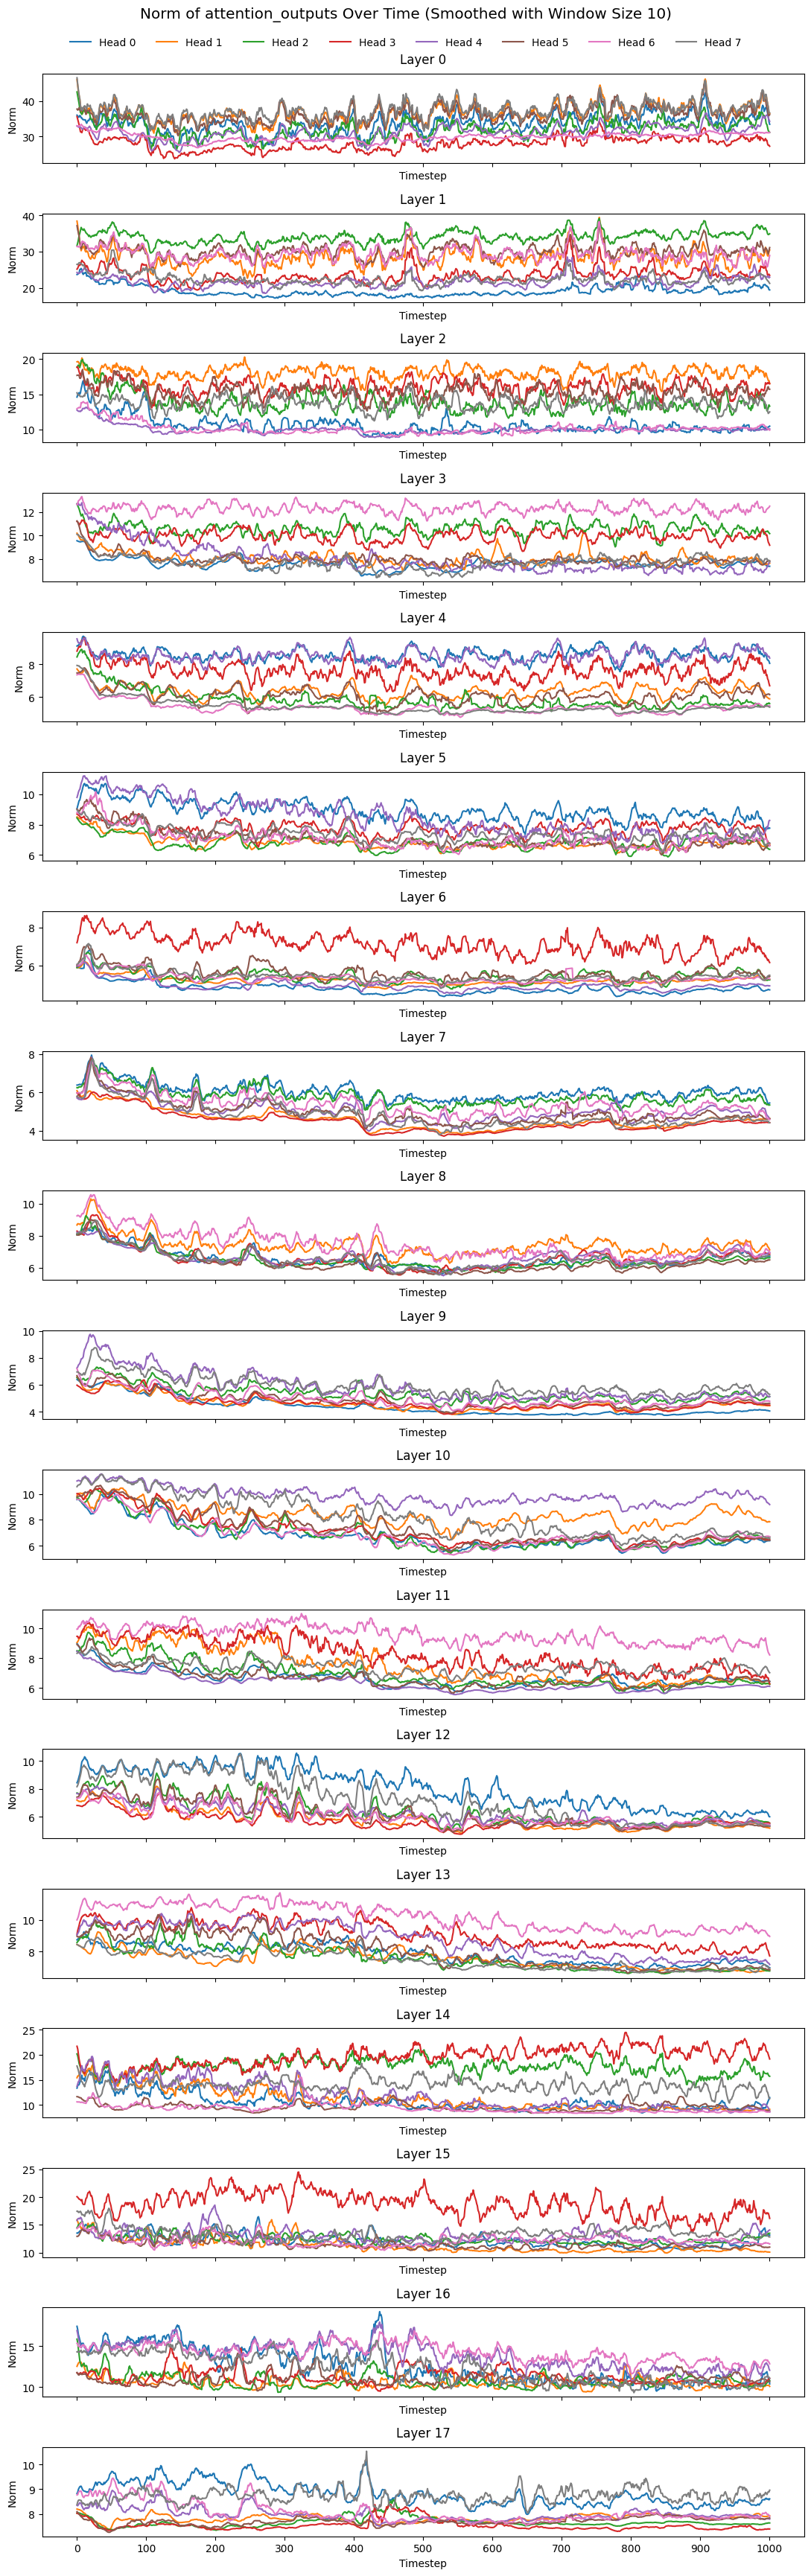

In [2]:
time_series = load_time_series(1) # Load the time series for the first 1000 tokens, choose from 0 to 4

plot_attention_metrics_norms_over_time(time_series, metrics=constants.METRICS_TRANSFORMER , num_heads_plot=8, smoothing_window=10, save=False)

## Redundancy and Synergy Heatmaps

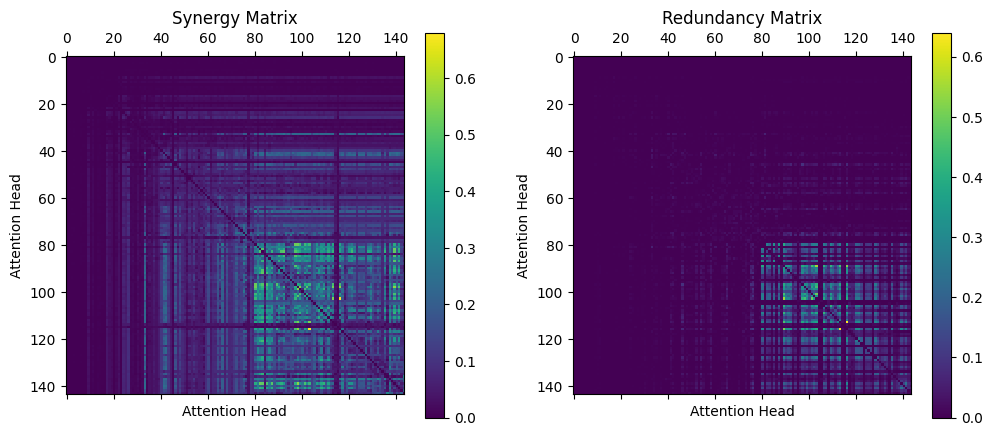

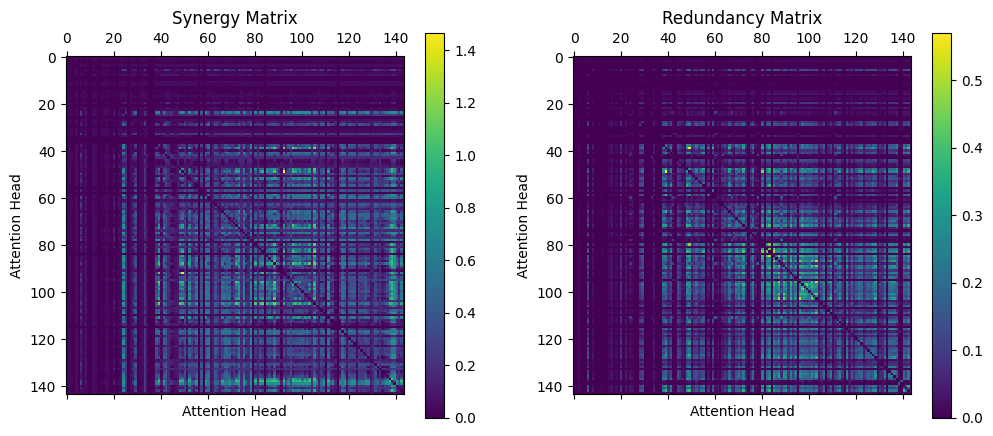

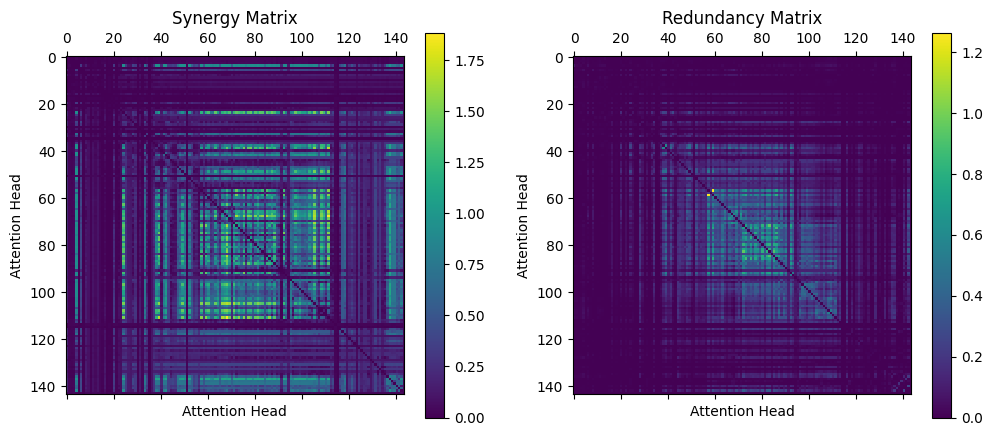

In [3]:
global_matrices, synergy_matrices, redundancy_matrices = compute_PhiID(time_series, metrics=constants.METRICS_TRANSFORMER)
plot_synergy_redundancy_PhiID(synergy_matrices, redundancy_matrices, save=False)
# plot_all_PhiID(global_matrices)

## Synergy-Redundancy Gradients

In [4]:
averages = calculate_averages_per_head(synergy_matrices, redundancy_matrices)
plot_averages_per_head(averages, save=True)

In [5]:
rank_gradients = compute_synergy_redundancy_rank_gradient(averages)
plot_synergy_redundancy_rank_gradient(rank_gradients, save=True)

In [6]:
gradient_percentiles = compute_gradient_percentile(averages)
plot_gradient_percentile(gradient_percentiles, save=True)

## Graph Connetivity

In [10]:
compare_synergy_redundancy(synergy_matrices, redundancy_matrices, constants.METRICS_TRANSFORMER, verbose=True)

glob_eff_syn bigger than glob_eff_red for projected_Q: True
Global Efficiency for Synergy Matrix (projected_Q): 0.11395823374056009, Global Efficiency for Redundancy Matrix (projected_Q): 0.037836578707438805
glob_eff_syn bigger than glob_eff_red for attention_weights: True
Global Efficiency for Synergy Matrix (attention_weights): 0.12441578327172555, Global Efficiency for Redundancy Matrix (attention_weights): 0.10624116318690546
glob_eff_syn bigger than glob_eff_red for attention_outputs: True
Global Efficiency for Synergy Matrix (attention_outputs): 0.15474209702417294, Global Efficiency for Redundancy Matrix (attention_outputs): 0.06973618395939142
modularity_redundancy bigger than modularity_synergy for projected_Q: False
Modularity of Synergy Matrix (projected_Q): 0.0942452496158952, Modularity of Redundancy Matrix (projected_Q): 0.09290177308527137
modularity_redundancy bigger than modularity_synergy for attention_weights: False
Modularity of Synergy Matrix (attention_weights): 

({'projected_Q': {'glob_eff_syn': 0.11395823374056009,
   'glob_eff_red': 0.037836578707438805,
   'glob_eff_syn > glob_eff_red': True},
  'attention_weights': {'glob_eff_syn': 0.12441578327172555,
   'glob_eff_red': 0.10624116318690546,
   'glob_eff_syn > glob_eff_red': True},
  'attention_outputs': {'glob_eff_syn': 0.15474209702417294,
   'glob_eff_red': 0.06973618395939142,
   'glob_eff_syn > glob_eff_red': True}},
 {'projected_Q': {'modularity_synergy': 0.0942452496158952,
   'modularity_redundancy': 0.09290177308527137,
   'modularity_redundancy > modularity_synergy': False},
  'attention_weights': {'modularity_synergy': 0.08957436127254492,
   'modularity_redundancy': 0.07101217879011162,
   'modularity_redundancy > modularity_synergy': False},
  'attention_outputs': {'modularity_synergy': 0.10854426697989439,
   'modularity_redundancy': 0.10467738946252275,
   'modularity_redundancy > modularity_synergy': False}})